In [0]:
NAME = "David Mikhael"
COLLABORATORS = ""

---

# CS110 Assignment 3 - Trie trees

**Fell free to add more cells to the ones always provided in each question to expand your answers, as needed. Make sure to refer to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1) on the grading guidelines, namely how many HC identifications and applications you are expected to include in each assignment.**

If you have any questions, do not hesitate to reach out to the TAs in the Slack channel "#cs110-algo", or come to one of your instructors' OHs.

### Submission Materials
Your assignment submission needs to include the following resources:
1. A PDF file must be the first resource and it will be created from the Jupyter notebook template provided in these instructions. Please make sure to use the same function names as the ones provided in the template. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your second resource must be a single Python/Jupyter Notebook named “Dumbledore.ipynb”. You can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore!).

For details on how to create a nice PDF from a Jupyter notebook, refer again to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1).

### HCs and LOs for this assignment
[#responsibility], [#PythonProgramming], [#CodeReadability], [#DataStructures], [#ComplexityAnalysis], [#ComputationalCritique]

## Question 0

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to the end of week 10 (inclusively).

This will be evidence that you have submitted acceptable pre-class and make-up work
for a CS110 session you may have missed. Check the specific CS110 make-up and
pre-class policies in the syllabus of the course.

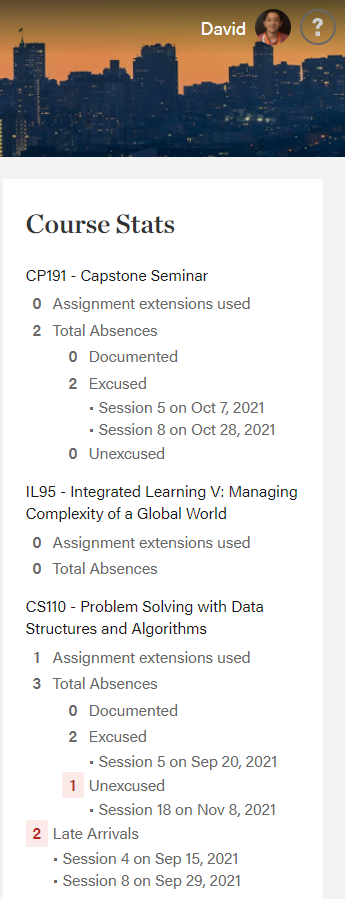

In [4]:
from IPython.display import Image
Image("CS110 Screenshot.png")

#I already submitted the makeup work for the unexcused one

## Overview

Auto-completion functionalities are now ubiquitous in search engines, document editors, and messaging apps. How would you go about developing an algorithmic strategy from scratch to implement these computational solutions? In this assignment, you will learn about a new data structure and use it to build a very simple auto-complete engine. Each question in the assignment guides you closer to that objective while encouraging you to contrast this novel data structure to the other ones we have discussed in class.

A [trie tree](https://en.wikipedia.org/wiki/Trie), or a prefix tree, is a common data structure that stores a set of strings in a collection of nodes so that all strings with a common prefix are found in the same branch of the tree. Each node is associated with a letter, and as you traverse down the tree, you pick up more letters, eventually forming a word. Complete words are commonly found on the leaf nodes. However, some inner nodes can also mark full words.

Let’s use an example diagram to illustrate several important features of tries:

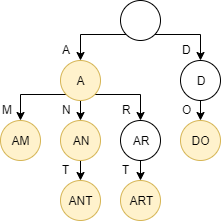

- Nodes that mark valid words are marked in yellow. Notice that while all leaves are considered valid words, only some inner nodes contain valid words, while some remain only prefixes to valid words appearing down the branch.

- The tree does not have to be balanced, and the height of different branches depends on its contents.

- In our implementation, branches never merge to show common suffixes (for example, both ANT and ART end in T, but these nodes are kept separate in their respective branches). However, this is a common first line of memory optimization for tries.

- The first node contains an empty string; it “holds the tree together.”

Your task in this assignment will be to implement a functional trie tree. You will be able to insert words into a dictionary, lookup valid and invalid words, print your dictionary in alphabetical order, and suggest appropriate suffixes like an auto-complete bot.

The assignment questions will guide you through these tasks one by one. To stay safe from breaking your own code, and to reinforce the idea of code versioning, under each new question first **copy your previous (working) code**, and only then **implement the new feature**. The code skeletons provided throughout will make this easier for you at the cost of repeating some large portions of code.

## Q1: Implement a trie tree

In this question, you will write Python code that can take a set/list/tuple of strings and insert them into a trie tree and lookup whether a specific word/string is present in the trie tree.

### Q1a: Theoretical pondering

Two main approaches to building trees, you might recall from class, are making separate Tree and Node classes, or only making a Node class. Which method do you think is a better fit for trie trees, and why? **Justify your reasoning in around 100 words.** You will use your chosen approach throughout the assignment, so don't rush this question.

. I use separate Tree and Node classes because:
1) I want to establish the tree root node (in self.root) as a special empty Node. This helps me by not having to create the tree root node in every method that needs it, because it's an object in the Trie class so it takes it. 
2) Having a separate Node class enables me to input the word node directly with its attributes as an object of the Node class into the Trie tree instead of having to add the string first. 
3) I want to keep my code neat and organized. Having separate attributes for each class does that by defining the attributes of the class according to the properties and functions that are relevant to it: the "node" level in the Node class, and the "tree" level in the Trie class. I can then use whatever property I want from each depending on the task, and in recursions I can easily call children beyond the root. 

. However, there are no differences in the computational efficiency of both methods.

### Q1b: Practical implementation

In the two cells below, there are two code skeletons. Depending on your answer to Q1a, either **implement a Node and a Trie class** or **implement a Node class**. Choose the corresponding code cell and delete the other one.

For your class(es), write **insert()** and **lookup()** methods, which will insert a word into the trie tree and look it up, respectively. Use the code skeleton and examine the specifications of its docstrings to guide you on the details of inputs and outputs to each method.

If you are coding two classes, your Trie should, upon initiation, create the root Node. If you are coding a single class, use an attribute to mark the root node.

Finally, make sure that the trie can be **initiated with a wordbank as an input**. This means that a user can create a trie and feed it an initial dictionary of words at the same time (like in the tests below), which will be automatically inserted into the trie upon its creation. Likely, this will mean that your \_\_init\_\_() has to make some calls to your insert() method.

Several test cases have been provided for your convenience and these include some, but not all, possible edge cases. If the implementation is correct, your code will pass all the tests. In addition, create at least **three more tests** to demonstrate that your code is working correctly and justify why such test cases are appropriate.

In [5]:
# VERSION 1 - Node + Trie classes
class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    A dictionary of children : Dictionary
    
    The data in stored in the node : str
    
    An attribute that marks nodes with complete words : Boolean
    
    
    """

    def __init__(self, data = False):   
        #Creates a children attribute 
        self.children = {} 
        #Specifies an attribute for the data in
        #the node (the word)
        self.data = data 
        #Initializes an attribute that stores 
        #whether a word is formed until current node
        self.isword = False
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
   
    
    def __init__(self, word_list):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        #Inializes an attribute for a missing root node using
        #the node class
        self.root_node = Node()
        #Inserts each word in the list of words into the trie,
        #but converts all letter to lower-case so that we are 
        #indifferent with capitalization
        for a in word_list:
            self.insert(a.lower())
            
            
    def insert(self, word):
        """ Inserts a given word into the tree
        
        Parameters
        ----------
        word : str
            The word to be inserted into the tree
        
        Inputs 
        ------
        - The tree nodes, starting from the root
        
        Returns
        -------
        None
        
        """
            
        
        #Creates a root variable that stores the root_node value
        #at which we start our iteration for inserting the first
        #letter of the word
        root = self.root_node
        #Iterates through letters in a given word, lower-cased
        for char in word.lower():
            #If a letter is already part of the children of the root
            if char in root.children:
                #Updates the root to be the letter that we found
                #so that we continue searching in the children of 
                #this letter
                root = root.children[char]
            else:
                #If the letter is not part of the currect root children,
                #creates a new node that has the letter inside the Node()
                #class
                child = Node(char)
                #Adds this newly created letter node as a value to the
                #dictionary of the current root children, the key is the
                #letter string
                root.children[char] = child
                #Updates the root to be the added child node
                root = child
        #Changes the isword attribute to be true for the root that marks the
        #last letter of a complete word
        root.isword = True
                
            
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """  
        #Creates a root variable that stores the root_node value
        #at which we start our iteration for searching for the first
        #letter of the word
        root = self.root_node
        #Iterates through letters in a given word, lower-cased
        for char in word.lower():
            #If a letter is not present in its corresponding children
            #dictionary, returns False because we know the word is not there
            if not char in root.children:
                return False
            #If a letter is present in the children dictionary, look for the
            #next one which should be in the updated root
            root = root.children[char]
            
        #Check the last letter we found marks the end of a complete word
        if root.isword == True:
            return True
        else:
            return False

In [38]:
# Here are several tests that have been created for you.
# Remeber that the question asks you to provide several more,
# as well as to justify them.

# This is Namárië, JRRT's elvish poem written in Quenya
wordbank = "Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! Yéni ve lintë yuldar avánier mi oromardi lisse-miruvóreva Andúnë pella, Vardo tellumar nu luini yassen tintilar i eleni ómaryo airetári-lírinen. Sí man i yulma nin enquantuva? An sí Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, ar ilyë tier undulávë lumbulë; ar sindanóriello caita mornië i falmalinnar imbë met, ar hísië untúpa Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, Valimar! Namárië! Nai hiruvalyë Valimar. Nai elyë hiruva. Namárië!".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()


trie = Trie(wordbank)
assert trie.lookup('oiolossëo') == True  # be careful about capital letters!
assert trie.lookup('an') == True  # this is a prefix, but also a word in itself
assert trie.lookup('ele') == False  # this is a prefix, but NOT a word
assert trie.lookup('Mithrandir') == False  # not in the wordbank



In [50]:
assert trie.lookup(' ') == False

assert trie.lookup('Ai') == True

assert trie.lookup('lisse-miruvóreva') == True

assert trie.lookup('velintë') == False

assert trie.lookup('i') == True

assert trie.lookup('!') == False

. The first test case is for when we look for an empty string as an edge case with only space to see how the algorithm deals with spaces as words or not

. The second test case is for when we look for a word but without the exclamation mark that is linked to it to see how the algorithm is or is not deceived by the exclamation mark being a letter

. The third test case is for when we look for a word that is a combination of two words separated by a dash to see how the algorithm will or will not recognize it as a single word

. The fourth test case is for when we look for a word that is only one letter to see how robust the algorithm is with the isword attribute

. The final test case is for when look for just an exclamation mark to see how the algorithm does or does not treat is as a single word entity

## Q2: The computational complexity of tries

Evaluate the **computational complexity of the insert() and lookup()** methods in a trie. What are the relevant variables for runtime? You might want to consider how the height of a trie is computed to start addressing this question.  Make sure to clearly explain your reasoning.

**Compare your results to** the runtime of the same operations on **a BST**. Can you think of specific circumstances where the practical runtimes of operations supported by tries are higher than for BSTs? Explain your answer. If you believe such circumstances could be common, why would someone even bother implementing a trie tree?

For insert --> O(N), where N is the number of letters in the word to be inserted:

- The number of letters in the input word (N) governs to the number of traversals we do (number of times we go down and look at children) until we insert the whole word. At the first step, we need to check if the first letter is present in the tree root's children or we should add it. Still at the last step, we need to check if the last (nth) letter is present in the children list of the appropriate parent root (in the nth row of the tree if we start counting after the tree root), if the word is already present or we should add the last letter and complete the word. Therefore, we do all the operations for a correct insertion N times. 

- The operations involved with each insertion include searching a children list for the letter of interest. Let the number of elements in a children list be noted as K. We go through all the K elements in the worst case scenario. K has an upper bound of 26 elements (alphabet letters)

- Besides searching, operations such as .lower() takes O(N) time. 

-- Therefore, T(N) = N * (O(K) + O(N)). From this equation and given K's bounds, the big O time complexity still scales as a function of N, the number of letters in a word to be inserted. i.e. at most, the loop still grows proportionally to the input size


For lookup --> O(N)

-- The lookup functions have the same elements as the insert functions and thus it follows the same logic.



Trie trees vs BSTs:

- The average runtime complexity of BSTs for insertion and looking up is O(H) where H is the overall height of the tree, and approximates to the overall number of nodes if the tree is highly unbalanced. On the other hand, the average runtime complexity for insertion and looking up in Trie trees is O(N) where n is the number of letters in the word to be inserted; since each letter is inserted at a different level, we can see N as the depth of the last letter of the input word . So, this is the first distinction: BST's runtime on those operations is proportional to the height of the tree (the number of nodes in the tree in the worst case of a highly unbalanced tree), while Trie tree's runtime is proportional to the number of letters in the input word. 

- One second distinction is that the BST structure allows for faster tree traversal (we know we should take the node to the left of the parent if our input is less that the parent and right if it's more). On the other hand, in Trie trees we have to search the whole children list (as many comparisons as 26) until we find our target node. This makes the constants associated with the runtime of the Trie tree bigger compared to BST, even if O(H) and O(N) yields the same number of traversals, i.e. even if the word to be inserted in the Trie has the same number of letters as the longest word so far in the tree. 

-- So, in the case that a word list has variable word lengths, and when there are repeated letter, O(N) of Tries will, most of the time, be smaller than O(H) of BSTs and the constants will not be significantly different. This makes the Trie tree more time efficient than the BST in that case. However, in other cases when a word list have words whose lengths are very similar, and when letters repetition is rare, BSTs become more time efficient than Trie trees. 

-- Although the circumstances that favor BSTs can still happen, Trie trees are more flexible in a sense that parent nodes can have more than two children, which is useful in this case of graphing word letters given that the alphabet consists of 26 letters. This makes Trie trees helpful in retrival and accessing elements in the tree based on structures and attributes it stores, for example because all descendants have common prefix, especially when the input size is large. This structure also makes Trie trees more suitable for the autocomplete function. In addition, Tries doesn't store key values for the nodes (the node's position is what implicitly defines its key) and they store a large number of nodes with few bits of data, which adds some space efficiency. However, Tries also store many pointers and attributes, which compromises space and memory efficiency. Finally, with Trie trees we don't care about the tree being balanced to optimize our time complexity.

## Q3: Print a dictionary in alphabetical order.

Recall the meaning of pre-order traversal from your previous classes. On the data structure of a trie tree, pre-order traversal corresponds to an alphabetically sorted list of the words contained within (provided that your node children are sorted alphabetically).

For example, on the example trie given in the introduction, pre-order traversal would return ["A", "AM, "AN", "ANT", "AR, "ART, "D" and "DO"]. However, since we are only interested in the actual words, we would not include "D" and "AR" in our list. To that end, you will need to include an attribute for each node, storing the information about whether its content is a word or not.

Copy your existing code to the code skeleton cell below, and add a new method to it, **alphabetical_list()**. This will be version two of your autocomplete script.

The method should **return a list**, whose elements will be the words contained in the tree, in alphabetical order. On top of passing the provided test, write at least **three more tests**, and explain why they are appropriate.

**Approach choice:** Remember the two possible approaches to the problem, as we’ve seen at the start of the course: iterative or recursive. Depending on your trie implementation, one might be preferred over the other. **Justify your choice of approach** in a few sentences (~100 words).

Copy-paste your previous code and make adjustments to this "new version", so that you cannot break the old one :).

*(Notes: If you choose a recursive approach, it might be useful to implement a helper method that is not called by the user but by preorder_traversal(). Also, watch out for the [unintuitive Python behaviour](https://web.archive.org/web/20200221224620/http://effbot.org/zone/default-values.htm) if defining functions with mutable default parameter values.)*

In [23]:
# depending on your choice of approach,
# add the method either to the Node or the Trie class.
class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    A dictionary of children : Dictionary
    
    The data in stored in the node : str
    
    An attribute that marks nodes with complete words : Boolean
    
    """

    def __init__(self, data = False):   
        self.children = {}
        self.data = data
        self.isword = False
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
   
    
    def __init__(self, word_list):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.root_node = Node()
        for a in word_list:
            self.insert(a.lower())
            
            
    def insert(self, word):
        """ Inserts a given word into the tree
        
        Parameters
        ----------
        word : str
            The word to be inserted into the tree
        
        Inputs 
        ------
        - The tree nodes, starting from the root
        
        Returns
        -------
        None
        
        """
        root = self.root_node
        for char in word.lower():
            if char in root.children:
                root = root.children[char]
            else:
                child = Node(char)
                root.children[char] = child
                root = child
                
        root.isword = True
                
            
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """  
        root = self.root_node
        self.allwords = []
        for char in word.lower():
            if not char in root.children:
                return False
            
            root = root.children[char]  
        if root.isword == True:
            return True
        else:
            return False
        
    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        #Creates a root variable that stores the root_node value
        #at which we start our iteration looking for and printing
        #complete words
        root = self.root_node
        #Initializes a list that stores the alphabetical sorting of words
        self.allwords = []
        #If the root node has children
        if root.children:
            #Initializes a variable that marks the index of the letter
            #extracted from the root node children at each step
            j = 0
            #Creates a list that stores the keys (str letters) of the children
            #of root node, i.e. the first letters of all words
            first_letters = list(root.children.keys())
            #Iterates through the children nodes of the root
            for i in root.children:
                #Stores each node, for each step, in a variable called node
                node = root.children[i]
                #Stores the letter that corresponds to the node we extracted
                this_word = first_letters[j]
                #Calls the continue_words function and enters the recursion below
                #with the current node and the corresponding letter as arguments
                self.continue_words(node, this_word)
                #Increment j to get the next letter
                j += 1
            
            #Sorts the generated word list alphabetically
            allwords_sorted = sorted(self.allwords)
            
            #returns the sorted word list
            return allwords_sorted
                  
                
    #Moves through nodes down the tree while storing the letter it passed by so far.
    #When it finds a node that marks a complete word, prints all those letter is stored
    def continue_words(self, node, current_letters):
        
        #Once it finds a nood that is the end of a complete word, prints all letters we
        #accumulated so far that creates a word
        if node.isword:
            self.allwords.append(current_letters)
        
        #Iterates through children of the current node
        for child in node.children:
            #Calls the recursive function but with an updated node (in the descendants of
            #the current) and cumulatively add the node keys along the way
            self.continue_words(node.children[child], current_letters + child)

In [33]:
# intiate the test by uncommenting one of the lines below, depending on your approach

wordbank = "Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien.".replace(",", "").replace(".", "").split()

trie = Trie(wordbank)
# trie = Node(wordbank)

assert trie.alphabetical_list() == ['a','ad','adipiscing','amet','aptent',
                                    'class','consectetuer','conubia',
                                    'curabitur','dapibus','dolor','duis',
                                    'elit','etiam','facilisis','hymenaeos',
                                    'inceptos','ipsum','ligula','litora',
                                    'lorem','mi','nostra','nunc','per',
                                    'pulvinar','quam','quis','sapien',
                                    'sit','sociosqu','sollicitudin','taciti',
                                    'torquent','tortor','vel','vestibulum']

In [32]:
wordbank = "David U S Mikhael Youssef".replace(",", "").replace(".", "").split()
trie = Trie(wordbank)
assert trie.alphabetical_list() == ['david', 'mikhael', 's', 'u', 'youssef']


wordbank = "Ten Tea Ton Not Eat Net Ate".replace(",", "").replace(".", "").split()
trie = Trie(wordbank)
assert trie.alphabetical_list() == ['ate', 'eat', 'net', 'not', 'tea', 'ten', 'ton']


wordbank = "A BC CA B BA CB C AB AC AA BB CC".replace(",", "").replace(".", "").split()
trie = Trie(wordbank)
assert(trie.alphabetical_list() == ['a', 'aa', 'ab', 'ac', 'b', 'ba', 'bb', 'bc', 'c', 'ca', 'cb', 'cc'])


. The first test case is for when we try to print words that vary in size, including even single letter initials (assuming they are words), in an alphabetical order

. The second test case is for when we try to print words that have very similar letters and share the first one or even two letters to see how the algorithm accurately sort them alphabetically

. The third test case assumes A, B, and C are words or word parts that start with A, B, or C and test the robustness of the algorithm when it sorts words whose parts are duplicates of others alphabetically.




- I decided to use a recursive approach because, first, it's more neat to read and follow along with it than if it was iterative and denser. Second, the recursive approach in building the alphabetical list was particularly useful because it helped me accumulate and store letters along the way as I was traversing down the tree by calling the continue_word function with an updated second parameter each time (current_letters + child). The recursive approach also helps in the traversal process by updating the new node parameter each time to be the target child of the previous node. Using recursion, however, demands more space, but it could be as efficient in time as its iterative counterpart.

## Q4: Find the k most common words in a speech.

To mathematically determine the overall connotation of a speech, you might want to compute which words are most frequently used and then run a [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). To this end, add a method to your code, **k_most_common()** that will take as an input k, an integer, and return a list of the k most common words from the dictionary within the trie. The structure of the output list should be such that each entry is a tuple, the first element being the word and the second an integer of its frequency (see docstring if you’re confused).

To complete this exercise, you don’t have to bother with resolving ties (for example, if k = 1, but there are two most common words with the same frequency, you can return either of them), but consider it an extra challenge and let us know if you believe you managed to solve it.

The test cell below downloads and preprocesses several real-world speeches, and then runs the k-most-common word analysis of them; your code should pass the tests. As usual, add at least **three more tests**, and justify why they are relevant to your code (feel free to find more speeches to start analysing too!).

Again, copy-paste your previous code and make adjustments to this "new version". The first cell has been locked to stop you from accidentally deleting the docstrings.

Completing this question well will help you to tackle Q5!

*(Hint: This task will probably require your nodes to store more information about the frequency of words inserted into the tree. One data structure that might be very useful to tackle the problem of traversing the tree and finding most common words is heaps — you are allowed to use the heapq library or another alternative for this task.)*

In [16]:
# depending on your choice of approach,
# add the method either to the Node or the Trie class
class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    A dictionary of children : Dictionary
    
    The data in stored in the node : str
    
    An attribute that marks nodes with complete words : Boolean
    
    A counter for the number of appearances of a word: int
    
    """

    def __init__(self, data = False):   
        self.children = {}
        self.data = data
        self.isword = False
        #The number of appearances of a word
        self.counter = 0
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
   
    
    def __init__(self, word_list):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.root_node = Node()
        for a in word_list:
            self.insert(a.lower())
            
            
    def insert(self, word):
        """ Inserts a given word into the tree
        
        Parameters
        ----------
        word : str
            The word to be inserted into the tree
        
        Inputs 
        ------
        - The tree nodes, starting from the root
        
        Returns
        -------
        None
        
        """
        root = self.root_node
        for char in word.lower():
            if char in root.children:
                root = root.children[char]
            else:
                child = Node(char)
                root.children[char] = child
                root = child
                
        root.isword = True
        #When a complete word is found, increment the counter
        #attribute of the final root of it by 1
        root.counter += 1
                
            
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """  
        root = self.root_node
        self.allwords = []
        for char in word.lower():
            if not char in root.children:
                return False
            
            root = root.children[char]  
        if root.isword == True:
            return True
        else:
            return False
     
    #Note that I changed the function name
    def frequency_sorted_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        root = self.root_node
        self.allwords = []
        if root.children:
            j = 0
            first_letters = list(root.children.keys())
            for i in root.children:
                node = root.children[i]
                this_word = first_letters[j]
                self.continue_words(node, this_word)
                j += 1
                
            allwords_sorted = sorted(self.allwords)
            
            #Sorts the alphabetically sorted word list by frequency in tuples of
            #(word, frequency)
            sorted_by_frequency = sorted(allwords_sorted, key = lambda x: x[1], reverse = True)

            #returns the frequency sorted list
            return sorted_by_frequency
                  
                
                
    def continue_words(self, node, current_letters):
        
        if node.isword:
            self.allwords.append((current_letters, node.counter))
            
        for child in node.children:
            self.continue_words(node.children[child], current_letters + child)
            
            
    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        #Stores the frequency sorted list of tuples in a variable
        list_of_words = self.frequency_sorted_list()
        
        #Initializes an empty list to store the most common k words list
        k_most_common = []
        
        #If k is zero doesn't return anything
        if k == 0:
            return None
        
        #If k is larger than the length of the list, returns an error of
        #going out of range 
        if k > len(list_of_words):
            return("error")
        
        #Else, initializes j to be zero, which refers to the index of the 
        #word to be extracted
        j = 0
        #Until we extract k elements (increment "j" k-1 times)
        while j < k:
            #Append the element at index j (starting from the first) to 
            #the most common k words list
            k_most_common.append(list_of_words[j])
            #Increments j
            j += 1
        
        #returns the k most common words (in tuples)
        return k_most_common

In [17]:
# depending on your choice of approach, 
# uncomment one of the lines in the for loop to initiate the test

# you might have to run 'pip install requests' before running this cell 
# since you're downloading data from an online resource 
# please note this might take a while to run

# Mehreen Faruqi - Black Lives Matter in Australia: https://bit.ly/CS110-Faruqi
# John F. Kennedy - The decision to go to the Moon: https://bit.ly/CS110-Kennedy
# Martin Luther King Jr. - I have a dream: https://bit.ly/CS110-King
# Greta Thunberg - UN Climate Summit message: https://bit.ly/CS110-Thunberg
# Vaclav Havel - Address to US Congress after the fall of Soviet Union: https://bit.ly/CS110-Havel

from requests import get
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    trie = Trie(just_words)
    # trie = Node(just_words)
    
    if speaker == 'Faruqi':
        Faruqi = [('the', 60), ('and', 45), ('to', 39), ('in', 37), 
                  ('of', 34), ('is', 25), ('that', 22), ('this', 21), 
                  ('a', 20), ('people', 20), ('has', 14), ('are', 13), 
                  ('for', 13), ('we', 13), ('have', 12), ('racism', 12), 
                  ('black', 11), ('justice', 9), ('lives', 9), ('police', 9)]
        assert trie.k_most_common(20) == Faruqi
    
    elif speaker == 'Kennedy':
        Kennedy = [('the', 117), ('and', 109), ('of', 93), ('to', 63), 
                   ('this', 44), ('in', 43), ('we', 43), ('a', 39), 
                   ('be', 30), ('for', 27), ('that', 27), ('as', 26), 
                   ('it', 24), ('will', 24), ('new', 22), ('space', 22), 
                   ('is', 21), ('all', 15), ('are', 15), ('have', 15), ('our', 15)]
        assert trie.k_most_common(21) == Kennedy
    
    elif speaker == 'Havel':
        Havel = [('the', 34), ('of', 23), ('and', 20), ('to', 15), 
                 ('in', 13), ('a', 12), ('that', 12), ('are', 9), 
                 ('we', 9), ('have', 8), ('human', 8), ('is', 8), 
                 ('you', 8), ('as', 7), ('for', 7), ('has', 7), ('this', 7), 
                 ('be', 6), ('it', 6), ('my', 6), ('our', 6), ('world', 6)]
        assert trie.k_most_common(22) == Havel
    
    elif speaker == 'King':
        King = [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), 
                ('be', 33), ('we', 29), ('will', 27), ('that', 24), ('is', 23), 
                ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), 
                ('from', 18), ('have', 17), ('our', 17), ('with', 16), 
                ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13)]
        assert trie.k_most_common(23) == King
    
    elif speaker == 'Thunberg':
        Thunbger = [('you', 22), ('the', 20), ('and', 16), ('of', 15), 
                    ('to', 14), ('are', 10), ('is', 9), ('that', 9), 
                    ('be', 8), ('not', 7), ('with', 7), ('i', 6), 
                    ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), 
                    ('we', 5), ('all', 4), ('dare', 4), ('here', 4), 
                    ('my', 4), ('people', 4), ('will', 4)]
        assert trie.k_most_common(24) == Thunbger
        
# Note: There are cleaner and more concise ways to write the code above, 
# but this way it should be easily understandable.

In [9]:
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    trie = Trie(just_words)
    # trie = Node(just_words)
    
    if speaker == 'Faruqi':
        Faruqi = [('the', 60), ('and', 45), ('to', 39), ('in', 37), 
                  ('of', 34)]
        assert trie.k_most_common(5) == Faruqi
    
    elif speaker == 'Kennedy':
        Kennedy = [('the', 117), ('and', 109), ('of', 93), ('to', 63), 
                   ('this', 44), ('in', 43), ('we', 43), ('a', 39), 
                   ('be', 30), ('for', 27), ('that', 27), ('as', 26), 
                   ('it', 24), ('will', 24), ('new', 22), ('space', 22), 
                   ('is', 21), ('all', 15), ('are', 15), ('have', 15), ('our', 15)]
        assert trie.k_most_common(0) == None
        
    elif speaker == 'King':
        King = [('the', 103)]
        assert trie.k_most_common(1) == King
   

    elif speaker == 'King':
        King = [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), 
                ('be', 33), ('we', 29), ('will', 27), ('that', 24), ('is', 23), 
                ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), 
                ('from', 18), ('have', 17), ('our', 17), ('with', 16), 
                ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13)]
        assert trie.k_most_common(999999) == "Error"

. The first test case is just a general test to the algorithm in picking the first k tuples from the frequency arranged tuples

. The second test case checks our k = 0 condition

. The third test case tests the ability of the algorithm to return a complete tuple of only one word which is the most common
 
. The last test case checks our K > len(word_list) condition, when we go out of range.

## Q5: Implement an autocomplete with a Shakespearean dictionary!

Your task is to create a new **autocomplete()** method for your class, which will take a string as an input, and return another string as an output. If the string is not present in the tree, the output will be the same as the input. However, if the string is present in the tree, your task is to find the most common word to which it is a prefix and return that word instead (this can still turn out to be itself).

To make the task more interesting, use the test cell code to download and parse “The Complete Works of William Shakespeare”, and insert them into a trie. Your autocomplete should then pass the following tests. As usual, add at least **three more test cases**, and explain why they are appropriate (you can use input other than Shakespeare for them).

Make sure to include a minimum **100 word-summary critically evaluating** your autocomplete engine. How does it really work? Your critical reflection needs to specifically evaluate the role of the different data structures used by their algorithm and what is the overall complexity that the algorithm offers. Can we do better? If so, how and by how much?

*(Hint: Again, depending on how you choose to implement it, your autocomplete() might make calls to other helper methods. However, make sure that autocomplete() is the method exposed to the user in order to pass the tests.)*

*This is a thoroughly frequentist approach to the problem, which is not the only method, and in many cases not the ideal method. However, if you were tasked with implementing something like [this](https://jqueryui.com/autocomplete/) or [this](https://xdsoft.net/jqplugins/autocomplete/), it might just be enough, so let’s give it a go. Good luck!*

In [20]:
# depending on your choice of approach, 
# add this method to your Node or Trie class

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    A dictionary of children : Dictionary
    
    The data in stored in the node : str
    
    An attribute that marks nodes with complete words : Boolean
    
    A counter for the number of appearances of a word: int
    
    """

    def __init__(self, data = False):   
        self.children = {}
        self.data = data
        self.isword = False
        self.counter = 0
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
   
    
    def __init__(self, word_list):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.root_node = Node()
        for a in word_list:
            self.insert(a.lower())
            
            
    def insert(self, word):
        """ Inserts a given word into the tree
        
        Parameters
        ----------
        word : str
            The word to be inserted into the tree
        
        Inputs 
        ------
        - The tree nodes, starting from the root
        
        Returns
        -------
        None
        
        """
        root = self.root_node
        for char in word.lower():
            if char in root.children:
                root = root.children[char]
            else:
                child = Node(char)
                root.children[char] = child
                root = child
                
        root.isword = True
        root.counter += 1
                
            
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """  
        root = self.root_node
        self.allwords = []
        for char in word.lower():
            if not char in root.children:
                return False
            
            root = root.children[char]  
        if root.isword == True:
            return True
        else:
            return False
        
    def frequency_sorted_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        root = self.root_node
        self.allwords = []
        if root.children:
            j = 0
            first_letters = list(root.children.keys())
            for i in root.children:
                node = root.children[i]
                this_word = first_letters[j]
                self.continue_words(node, this_word)
                j += 1
                
            allwords_sorted = sorted(self.allwords)
            sorted_by_frequency = sorted(allwords_sorted, key = lambda x: x[1], reverse = True)

            return sorted_by_frequency
                  
                
                
    def continue_words(self, node, current_letters):
        
        if node.isword:
            self.allwords.append((current_letters, node.counter))
            
        for child in node.children:
            self.continue_words(node.children[child], current_letters + child)
            
            
    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        list_of_words = self.frequency_sorted_list()
                
        k_most_common = []
        
        if k == 0:
            return None
        
        if k > len(list_of_words):
            return("error")
        

        j = 0
        while j < k:
            k_most_common.append(list_of_words[j])
            j += 1
            
        return k_most_common
    

    def autocomplete(self, prefix):
        """Finds the most common word with the given prefix.

        You might want to reuse some functionality or ideas from Q4.

        Parameters
        ----------
        prefix : str
            The word part to be “autocompleted”.

        Returns
        ----------
        str
            The complete, most common word with the given prefix.
            
        Notes
        ----------
        The return value is equal to prefix if there is no valid word in the trie.
        The return value is also equal to prefix if prefix is the most common word.
        """
        #Stores the frequency sorted list of tuples in a variable (we use this
        #because we want to first look at the most common words for suggestions)
        list_of_words = self.frequency_sorted_list()
        
        #The edge case of an empty prefix
        if prefix == '':
            return None
        
        ##Iterates through the list of tuples
        for element in list_of_words:
            #Store the first tuple element of each tuple (the word) in a varible
            actual_word = element[0]
            #Store the length of the input prefix in a variable
            prefix_length = len(prefix)
            
            #If the prefix is equal to the corresponding part in the 
            #actual word
            if prefix == actual_word[0:prefix_length]:
                #Autocomplete the prefix by returning the whole actual word
                return actual_word
                #No need to do future searches, since we autocompleted with 
                #a word that is more common (important) that all that follow it
                break
        
        #If can't find a corresponding word, returns the prefix
        return prefix
        
 


In [21]:
# depending on your choice of approach, uncomment one of the lines below
# The Complete Works of William Shakespeare is a LARGE book, 
# so the code might take a while to run

from requests import get
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']']

SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]

SH_trie = Trie(SH_just_words)
# SH_trie = Node(SH_just_words)

assert SH_trie.autocomplete('hist') == 'history'
assert SH_trie.autocomplete('en') == 'enter'
assert SH_trie.autocomplete('cae') == 'caesar'
assert SH_trie.autocomplete('gen') == 'gentleman'
assert SH_trie.autocomplete('pen') == 'pen'
assert SH_trie.autocomplete('tho') == 'thou'
assert SH_trie.autocomplete('pent') == 'pentapolis'
assert SH_trie.autocomplete('petr') == 'petruchio'

In [3]:
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']']

SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]

SH_trie = Trie(SH_just_words)

assert SH_trie.autocomplete('Shakespeare') == 'Shakespeare'
assert SH_trie.autocomplete('') == None
assert SH_trie.autocomplete('hiss') == 'hiss'

. The first test case checks for when we have a prefix that is a complete word; if it's not present in the list, the prefix should be returned; if it's present, the prefix should also be returned

. The second test case checks for the edge case when the input is an empty string

. The final test case checks a prefix that is a complete word in the list, and whose first three letter are part of a word that is common (history); we see if the algorithm returns this prefix and doesn't get fooled to autocomplete with another word




The algorithm's evaluation: 

My algorithm works by searching for a prefix in the list of words in tree and it either returns the prefix if it's a complete word or returns the most common word that starts with this prefix. For this, I used the output list of the k_most_common function by having k = the number of words (or the output of the frequency_sorted_list function). This enabled me to make sure, even when two or more words start with the same prefix, the prefix is autocompleted by the word that is the most common. This, however, adds some time complexity because I call the frequency_sorted_list method to get the list of words sorted by their frequency. I'm also aware that the sorted() function takes some time complexity, depending on the sorting algorithm python uses, that can be up to O(n^2). I could have use a different data structure for this task which is the tree itself. In this case, the algorithm would search for the prefix as if it does a lookup, and then look at its descendants if there is any node with .isword = True, accumulating letters along the way, and returning the word ending at that node; if it found more than one node with .isword = True, it should return the one with the highest .counter; if .isword was always False, it would return the prefix itself. 


The method that I implemented here, although it was easier to implement once I completed the k_most_common method, its time complexity scales as a function of O(N^H), where the upper-bound of N is 26 if each node (letter) in the tree has 26 children nodes (all the 26 alphabet letters follow it in different words), and H is the height of the tree. In addition, there is some time complexity associated with the sorted() function that could be up to O(n^2) where n is the number of words). On the other hand, the time complexity of the latter method that starts similar to the lookup function is O(N), where N is the number of words in the prefix, until the algorithm finds the node that marks the end of the prefix. After it finds the prefix, it will continue with the same time complexity as the method I have here (with H = the number of levels after the prefix's last letter) because it will blindly look down for all words that are descendants of the prefix to pick the one that is the most common. By comparing the runtime of both methods, we find that the latter one is more time efficient but will make my code less organized. 

